In [45]:
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline
import os
from random import shuffle
import math
import pandas as pd
from scipy import optimize
import numpy.ma as ma
from itertools import zip_longest

# RED AP-MS

In [56]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

def grafo(datosRed):
    G = nx.Graph()
    for i in range(np.shape(datosRed)[0]):
        G.add_edges_from([(datosRed[i][0],datosRed[i][1])])
    return G 

In [57]:
APMS = ldata('yeast_AP-MS.txt')
GAPMS = grafo(APMS)

Y2H=ldata('yeast_Y2H.txt')
GY2H=grafo(Y2H)

LIT=ldata('yeast_LIT.txt')
GLIT=grafo(LIT)

LIT_R=ldata('yeast_LIT_Reguly.txt')
GLIT_R=grafo(LIT_R)

# Calculo coeficientes de centralidad

In [68]:
# degrees=dict(Gc.degree())
# eigenvectors=nx.eigenvector_centrality_numpy(Gc)
#subgraph= nx.subgraph_centrality(G)
#shortpath=nx.betweenness_centrality(Gc)
#currentflow=nx.current_flow_betweenness_centrality(Gc)

def param(G):
   #parametros=[dict(G.degree()),nx.subgraph_centrality(G),nx.betweenness_centrality(G)] #,nx.current_flow_betweenness_centrality(G)]  
    parametros=[nx.betweenness_centrality(G)]
    return parametros

In [69]:
#FUNCIÓN QUE ORDENA LOS NODOS DE MANERA DECRECIENTE SEGÚN PARÁMETRO DEL 'CRITERIO'
def ordenanodos(criterio): #criterio=diccionario 'nombredenodo':valor de parametro
    parametro=criterio.values()
    parametroordenado=sorted(set(parametro),reverse=True)
    nodosordenados=[]
    for j in parametroordenado:
        for key,value in criterio.items():
            if value==j:
                nodosordenados.append(key)
    return(nodosordenados)

# DESARM

In [72]:
def desarm(G):

    FN=[]
    LGC=[]
    
    Gc = max(nx.connected_component_subgraphs(G), key=len)
    parametros=param(Gc)
    
    for k in range(len(parametros)):
        parametro=parametros[k]
              
        Pimp=ordenanodos(parametro)
        GcDesarmable = max(nx.connected_component_subgraphs(G), key=len) #Me creo una copia de la componente Gigante Original.
        LengthOriginalGc=len(Gc)
        LargestGc=[]
        
        for m in range(len(Gc)):
            for i in range(10):
                GcDesarmable.remove_node(Pimp[i])
                LargestGc.append(float(len(max(nx.connected_component_subgraphs(GcDesarmable), key=len)))/LengthOriginalGc)
                print('lenGc',len(GcDesarmable))
                if len(GcDesarmable)<10:
                    break
            GcDesarmable = max(nx.connected_component_subgraphs(GcDesarmable), key=len)
            parametro=param(GcDesarmable)[k]
            Pimp=ordenanodos(parametro)
                
        
        LGC.append(LargestGc)
        FN.append(np.linspace(1,len(LargestGc),len(LargestGc))/LengthOriginalGc)
    return FN,LGC

In [10]:
FN_APMS,LGC_APMS=desarm(GAPMS)

CurrentAPMS=np.zeros((len(FN_APMS[0]),2))
CurrentAPMS[:,0]=FN_APMS[0]
CurrentAPMS[:,1]=LGC_APMS[0]

ShortestAPMS=np.zeros((len(FN_APMS[1]),2))
ShortestAPMS[:,0]=FN_APMS[1]
ShortestAPMS[:,1]=LGC_APMS[1]

np.savetxt('CurrentAPMS.txt', CurrentAPMS, delimiter=',')
np.savetxt('ShortestAPMS.txt', ShortestAPMS, delimiter=',')

FN_Y2H,LGC_Y2H=desarm(GY2H)

CurrentY2H=np.zeros((len(FN_Y2H[0]),2))
CurrentY2H[:,0]=FN_Y2H[0]
CurrentY2H[:,1]=LGC_Y2H[0]

ShortestY2H=np.zeros((len(FN_Y2H[1]),2))
ShortestY2H[:,0]=FN_Y2H[1]
ShortestY2H[:,1]=LGC_Y2H[1]

np.savetxt('CurrentY2H.txt', CurrentY2H, delimiter=',')
np.savetxt('ShortestY2H.txt', ShortestY2H, delimiter=',') 

FN_LIT,LGC_LIT=desarm(GLIT)

CurrentLIT=np.zeros((len(FN_LIT[0]),2))
CurrentLIT[:,0]=FN_LIT[0]
CurrentLIT[:,1]=LGC_LIT[0]

ShortestLIT=np.zeros((len(FN_LIT[1]),2))
ShortestLIT[:,0]=FN_LIT[1]
ShortestLIT[:,1]=LGC_LIT[1]

np.savetxt('CurrentLIT.txt', CurrentLIT, delimiter=',')
np.savetxt('ShortestLIT.txt', ShortestLIT, delimiter=',')

FN_LIT_R,LGC_LIT_R=desarm(GLIT_R)

CurrentLIT_R=np.zeros((len(FN_LIT_R[0]),2))
CurrentLIT_R[:,0]=FN_LIT_R[0]
CurrentLIT_R[:,1]=LGC_LIT_R[0]

ShortestLIT_R=np.zeros((len(FN_LIT_R[1]),2))
ShortestLIT_R[:,0]=FN_LIT_R[1]
ShortestLIT_R[:,1]=LGC_LIT_R[1]

np.savetxt('CurrentLIT_R.txt', CurrentLIT_R, delimiter=',')
np.savetxt('ShortestLIT_R.txt', ShortestLIT_R, delimiter=',') 

lenGc 1003
lenGc 995
lenGc 992
lenGc 991
lenGc 931
lenGc 892
lenGc 890
lenGc 828
lenGc 825
lenGc 819
lenGc 817
lenGc 816
lenGc 583
lenGc 580
lenGc 579
lenGc 507
lenGc 467
lenGc 466
lenGc 463
lenGc 459
lenGc 418
lenGc 417
lenGc 414
lenGc 341
lenGc 340
lenGc 339
lenGc 338
lenGc 312
lenGc 298
lenGc 289
lenGc 285
lenGc 274
lenGc 267
lenGc 266
lenGc 265
lenGc 264
lenGc 263
lenGc 262
lenGc 261
lenGc 260
lenGc 259
lenGc 258
lenGc 257
lenGc 256
lenGc 255
lenGc 254
lenGc 253
lenGc 232
lenGc 231
lenGc 230
lenGc 229
lenGc 225
lenGc 224
lenGc 223
lenGc 222
lenGc 221
lenGc 220
lenGc 216
lenGc 214
lenGc 213
lenGc 211
lenGc 210
lenGc 209
lenGc 207
lenGc 206
lenGc 152
lenGc 151
lenGc 150
lenGc 149
lenGc 148
lenGc 146
lenGc 145
lenGc 144
lenGc 143
lenGc 142
lenGc 141
lenGc 139
lenGc 138
lenGc 130
lenGc 129
lenGc 128
lenGc 123
lenGc 121
lenGc 120
lenGc 119
lenGc 118
lenGc 117
lenGc 116
lenGc 115
lenGc 114
lenGc 113
lenGc 112
lenGc 60
lenGc 58
lenGc 56
lenGc 55
lenGc 54
lenGc 52
lenGc 51
lenGc 50
lenGc 4

lenGc 2342
lenGc 2341
lenGc 2340
lenGc 2337
lenGc 2332
lenGc 2331
lenGc 2330
lenGc 2329
lenGc 2327
lenGc 2326
lenGc 2324
lenGc 2323
lenGc 2322
lenGc 2317
lenGc 2315
lenGc 2314
lenGc 2313
lenGc 2312
lenGc 2311
lenGc 2310
lenGc 2309
lenGc 2308
lenGc 2293
lenGc 2282
lenGc 2265
lenGc 2261
lenGc 2260
lenGc 2259
lenGc 2257
lenGc 2256
lenGc 2253
lenGc 2252
lenGc 2251
lenGc 2249
lenGc 2248
lenGc 2246
lenGc 2241
lenGc 2238
lenGc 2237
lenGc 2236
lenGc 2233
lenGc 2232
lenGc 2231
lenGc 2230
lenGc 2229
lenGc 2226
lenGc 2225
lenGc 2224
lenGc 2223
lenGc 2220
lenGc 2217
lenGc 2216
lenGc 2215
lenGc 2214
lenGc 2213
lenGc 2212
lenGc 2211
lenGc 2210
lenGc 2208
lenGc 2207
lenGc 2205
lenGc 2203
lenGc 2202
lenGc 2201
lenGc 2195
lenGc 2194
lenGc 2193
lenGc 2191
lenGc 2190
lenGc 2189
lenGc 2188
lenGc 2187
lenGc 2185
lenGc 2184
lenGc 2182
lenGc 2181
lenGc 2180
lenGc 2178
lenGc 2177
lenGc 2176
lenGc 2175
lenGc 2174
lenGc 2173
lenGc 2172
lenGc 2171
lenGc 2169
lenGc 2166
lenGc 2164
lenGc 2163
lenGc 2162
lenGc 2161

KeyboardInterrupt: 

In [73]:
FN_LIT_R,LGC_LIT_R=desarm(GLIT_R)
ShortestLIT_R=np.zeros((len(FN_LIT_R[0]),2))
ShortestLIT_R[:,0]=FN_LIT_R[0]
ShortestLIT_R[:,1]=LGC_LIT_R[0]
np.savetxt('ShortestLIT_R.txt', ShortestLIT_R, delimiter=',') 

lenGc 3223
lenGc 3222
lenGc 3221
lenGc 3220
lenGc 3219
lenGc 3218
lenGc 3217
lenGc 3216
lenGc 3215
lenGc 3214
lenGc 2910
lenGc 2909
lenGc 2908
lenGc 2907
lenGc 2906
lenGc 2905
lenGc 2904
lenGc 2903
lenGc 2902
lenGc 2901
lenGc 2805
lenGc 2804
lenGc 2803
lenGc 2802
lenGc 2801
lenGc 2800
lenGc 2799
lenGc 2798
lenGc 2797
lenGc 2796
lenGc 2729
lenGc 2728
lenGc 2727
lenGc 2726
lenGc 2725
lenGc 2724
lenGc 2723
lenGc 2722
lenGc 2721
lenGc 2720
lenGc 2659
lenGc 2658
lenGc 2657
lenGc 2656
lenGc 2655
lenGc 2654
lenGc 2653
lenGc 2652
lenGc 2651
lenGc 2650
lenGc 2583
lenGc 2582
lenGc 2581
lenGc 2580
lenGc 2579
lenGc 2578
lenGc 2577
lenGc 2576
lenGc 2575
lenGc 2574
lenGc 2549
lenGc 2548
lenGc 2547
lenGc 2546
lenGc 2545
lenGc 2544
lenGc 2543
lenGc 2542
lenGc 2541
lenGc 2540
lenGc 2504
lenGc 2503
lenGc 2502
lenGc 2501
lenGc 2500
lenGc 2499
lenGc 2498
lenGc 2497
lenGc 2496
lenGc 2495
lenGc 2431
lenGc 2430
lenGc 2429
lenGc 2428
lenGc 2427
lenGc 2426
lenGc 2425
lenGc 2424
lenGc 2423
lenGc 2422
lenGc 2305

ValueError: max() arg is an empty sequence

In [ ]:
# plt.plot(FN[0],LGC[0],label='degree')
# plt.plot(FN[1],LGC[1],label='shortest_path')
# plt.plot(FN[2],LGC[2],label='subgraph')
# plt.plot(FN[3],LGC[3],label='current_flow')
# plt.plot(FN[3],LGC[3],label='eigenvector')
plt.xlabel('Fraction of nodes')
plt.ylabel('Largest Giant Component')
plt.legend()

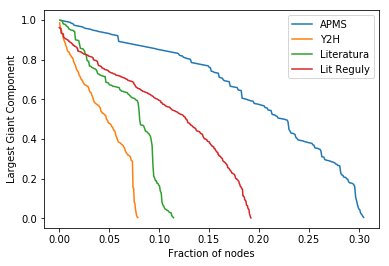

In [14]:
plt.plot(FN_APMS[0],LGC_APMS[0],label='APMS')
plt.plot(FN_Y2H[0],LGC_Y2H[0],label='Y2H')
plt.plot(FN_LIT[0],LGC_LIT[0],label='Literatura')
plt.plot(FN_LIT_R[0],LGC_LIT_r[0],label='Lit Reguly')
# plt.plot(FN[3],LGC[3],label='eigenvector')
plt.xlabel('Fraction of nodes')
plt.ylabel('Largest Giant Component')
plt.legend()

In [81]:
RandomAPMS=np.zeros((len(FN_R_APMS),2))
RandomAPMS[:,0]=FN_R_APMS
RandomAPMS[:,1]=LGC_R_APMS

RandomY2H=np.zeros((len(FN_R_Y2H),2))
RandomY2H[:,0]=FN_R_Y2H
RandomY2H[:,1]=LGC_R_Y2H

RandomLIT=np.zeros((len(FN_R_LIT),2))
RandomLIT[:,0]=FN_R_LIT
RandomLIT[:,1]=LGC_R_LIT

RandomLIT_R=np.zeros((len(FN_R_LIT_R),2))
RandomLIT_R[:,0]=FN_R_LIT_R
RandomLIT_R[:,1]=LGC_R_LIT_r

In [82]:
np.savetxt('RandomAPMS.txt', RandomAPMS, delimiter=',')
np.savetxt('RandomY2H.txt', RandomY2H, delimiter=',')
np.savetxt('RandomLIT.txt', RandomLIT, delimiter=',')
np.savetxt('RandomLIT_R.txt', RandomLIT_R, delimiter=',') 


In [28]:
EigenAPMS=np.loadtxt('EigenAPMS.txt',delimiter=',')
EigenY2H=np.loadtxt('EigenY2H.txt',delimiter=',')
EigenLIT=np.loadtxt('EigenLIT.txt',delimiter=',')
EigenLIT_R=np.loadtxt('EigenLIT_R.txt',delimiter=',')


# Saco los nodos esenciales de mi componente gigante

In [20]:
essentiality=ldata('Essential.txt')

ess=[]
for i in range(len(essentiality)):
    ess.append(essentiality[i][1])
    
def essentiality(nodo): 
    if len({nodo}.intersection(set(ess)))==0:
        e=0
    else:
        e=1
    return e   

def AssignEssentiality(G,dict_ess):
    for n in G.nodes:
        G.nodes[n]["essentiality"] = dict_ess[n]
    return

def NodosEsenciales(G):
    dict_ess = { nodo: essentiality(nodo) for nodo  in G.nodes() }
    AssignEssentiality(G,dict_ess)
    nodosesenciales=[]
    for nodo in list(set(G.nodes())):
        if G.nodes.data("essentiality")[nodo]==1:
            nodosesenciales.append(nodo)
    return(nodosesenciales)

def SinEsenciales(G):
    GcEsencial = max(nx.connected_component_subgraphs(G), key=len) #Me creo una copia de la componente Gigante Original.
    LengthOriginalGc=len(max(nx.connected_component_subgraphs(G), key=len))
    nodosesenciales=NodosEsenciales(GcEsencial)
    for nodo in nodosesenciales:
        GcEsencial.remove_node(nodo)
    FN=float(len(nodosesenciales))/LengthOriginalGc
    LGC=float(len(max(nx.connected_component_subgraphs(GcEsencial), key=len)))/LengthOriginalGc
    return FN,LGC

In [21]:
FN_E_APMS,LGC_E_APMS=SinEsenciales(GAPMS)
FN_E_Y2H,LGC_E_Y2H=SinEsenciales(GY2H)
FN_E_LIT,LGC_E_LIT=SinEsenciales(GLIT)
FN_E_LIT_R,LGC_E_LIT_R=SinEsenciales(GLIT_R)

In [85]:
EfectoEsencial=np.zeros((4,2))
EfectoEsencial[0,0]=FN_E_APMS
EfectoEsencial[0,1]=LGC_E_APMS
EfectoEsencial[1,0]=FN_E_Y2H
EfectoEsencial[1,1]=LGC_E_Y2H
EfectoEsencial[2,0]=FN_E_LIT
EfectoEsencial[2,1]=LGC_E_LIT
EfectoEsencial[3,0]=FN_E_LIT_R
EfectoEsencial[3,1]=LGC_E_LIT_R

np.savetxt('EfectoEsencial.txt', EfectoEsencial, delimiter=',') 

# Saco de manera RANDOM

In [53]:
def Random(G,iteraciones,cuantos):
    LGCTotal=[]
    for i in range(iteraciones): 
        GcRandom = max(nx.connected_component_subgraphs(G), key=len) #Me creo una copia de la componente Gigante Original.
        LengthOriginalGc=len(max(nx.connected_component_subgraphs(G), key=len))
        nodosrandom=np.random.permutation(list(GcRandom.nodes()))
        LGC=[]
        for nodo in nodosrandom:
            if len({nodo}.intersection(GcRandom.nodes()))==1:
                GcRandom.remove_node(nodo)
                LGC.append(float(len(max(nx.connected_component_subgraphs(GcRandom), key=len)))/LengthOriginalGc)
                GcRandom = max(nx.connected_component_subgraphs(GcRandom), key=len)          
                print('lenGc',len(GcRandom))
            if len(LGC)==cuantos:
                break
        
        LGCTotal.append(LGC)
    LGCRandom=np.average(LGCTotal, axis=0)
    FNRandom=np.linspace(1,len(LGCRandom),len(LGCRandom))/LengthOriginalGc
    return FNRandom,LGCRandom

In [60]:
len(max(nx.connected_component_subgraphs(GLIT_R), key=len))

3224

In [65]:

#FNRandomAPMS,LGCRandomAPMS=Random(GAPMS,5,452)
#FNRandomY2H,LGCRandomY2H=Random(GY2H,5,411)
#FNRandomLIT,LGCRandomLIT=Random(GLIT,5,370)
#FNRandomLIT_R,LGCRandomLIT_R=Random(GLIT_R,5,967)



lenGc 3223
lenGc 3221
lenGc 3220
lenGc 3219
lenGc 3218
lenGc 3217
lenGc 3215
lenGc 3214
lenGc 3213
lenGc 3212
lenGc 3209
lenGc 3208
lenGc 3206
lenGc 3205
lenGc 3204
lenGc 3203
lenGc 3202
lenGc 3201
lenGc 3200
lenGc 3199
lenGc 3198
lenGc 3197
lenGc 3196
lenGc 3195
lenGc 3194
lenGc 3193
lenGc 3192
lenGc 3191
lenGc 3190
lenGc 3189
lenGc 3188
lenGc 3187
lenGc 3186
lenGc 3185
lenGc 3184
lenGc 3183
lenGc 3182
lenGc 3176
lenGc 3175
lenGc 3173
lenGc 3172
lenGc 3165
lenGc 3164
lenGc 3163
lenGc 3162
lenGc 3160
lenGc 3159
lenGc 3158
lenGc 3157
lenGc 3156
lenGc 3155
lenGc 3154
lenGc 3152
lenGc 3151
lenGc 3150
lenGc 3149
lenGc 3148
lenGc 3147
lenGc 3146
lenGc 3144
lenGc 3143
lenGc 3140
lenGc 3139
lenGc 3138
lenGc 3137
lenGc 3136
lenGc 3135
lenGc 3134
lenGc 3133
lenGc 3132
lenGc 3131
lenGc 3130
lenGc 3129
lenGc 3128
lenGc 3122
lenGc 3121
lenGc 3119
lenGc 3118
lenGc 3117
lenGc 3115
lenGc 3114
lenGc 3113
lenGc 3112
lenGc 3111
lenGc 3110
lenGc 3109
lenGc 3108
lenGc 3107
lenGc 3106
lenGc 3105
lenGc 3104

lenGc 2265
lenGc 2264
lenGc 2263
lenGc 2262
lenGc 2261
lenGc 2260
lenGc 2259
lenGc 2258
lenGc 2257
lenGc 2254
lenGc 2253
lenGc 2252
lenGc 2249
lenGc 2248
lenGc 2247
lenGc 2246
lenGc 2245
lenGc 2244
lenGc 2242
lenGc 2240
lenGc 2235
lenGc 2234
lenGc 2233
lenGc 2232
lenGc 2231
lenGc 2229
lenGc 2228
lenGc 2227
lenGc 2226
lenGc 2225
lenGc 2224
lenGc 2223
lenGc 2222
lenGc 2220
lenGc 2219
lenGc 2218
lenGc 2216
lenGc 2214
lenGc 2213
lenGc 2210
lenGc 2209
lenGc 2208
lenGc 2207
lenGc 2206
lenGc 2205
lenGc 2204
lenGc 2203
lenGc 2202
lenGc 2201
lenGc 2200
lenGc 2199
lenGc 2193
lenGc 2192
lenGc 2189
lenGc 2188
lenGc 2187
lenGc 2186
lenGc 2185
lenGc 2184
lenGc 2183
lenGc 2182
lenGc 2181
lenGc 2180
lenGc 2179
lenGc 2178
lenGc 2177
lenGc 2176
lenGc 2175
lenGc 2174
lenGc 2173
lenGc 2169
lenGc 2168
lenGc 2167
lenGc 2166
lenGc 2165
lenGc 2162
lenGc 2161
lenGc 2160
lenGc 2159
lenGc 2157
lenGc 2156
lenGc 2155
lenGc 2154
lenGc 2153
lenGc 2152
lenGc 2151
lenGc 2150
lenGc 2149
lenGc 2148
lenGc 2147
lenGc 2146

lenGc 2590
lenGc 2589
lenGc 2588
lenGc 2587
lenGc 2586
lenGc 2585
lenGc 2581
lenGc 2580
lenGc 2579
lenGc 2575
lenGc 2574
lenGc 2573
lenGc 2572
lenGc 2571
lenGc 2570
lenGc 2569
lenGc 2568
lenGc 2567
lenGc 2564
lenGc 2563
lenGc 2558
lenGc 2557
lenGc 2553
lenGc 2552
lenGc 2551
lenGc 2550
lenGc 2549
lenGc 2548
lenGc 2544
lenGc 2543
lenGc 2541
lenGc 2540
lenGc 2538
lenGc 2537
lenGc 2535
lenGc 2534
lenGc 2533
lenGc 2532
lenGc 2531
lenGc 2530
lenGc 2529
lenGc 2520
lenGc 2519
lenGc 2518
lenGc 2517
lenGc 2516
lenGc 2515
lenGc 2514
lenGc 2513
lenGc 2512
lenGc 2511
lenGc 2510
lenGc 2509
lenGc 2508
lenGc 2506
lenGc 2505
lenGc 2504
lenGc 2503
lenGc 2502
lenGc 2501
lenGc 2500
lenGc 2499
lenGc 2498
lenGc 2497
lenGc 2496
lenGc 2495
lenGc 2494
lenGc 2493
lenGc 2492
lenGc 2491
lenGc 2490
lenGc 2486
lenGc 2485
lenGc 2484
lenGc 2483
lenGc 2482
lenGc 2481
lenGc 2480
lenGc 2479
lenGc 2478
lenGc 2477
lenGc 2476
lenGc 2475
lenGc 2473
lenGc 2472
lenGc 2471
lenGc 2470
lenGc 2467
lenGc 2466
lenGc 2463
lenGc 2460

lenGc 2842
lenGc 2841
lenGc 2840
lenGc 2839
lenGc 2838
lenGc 2837
lenGc 2836
lenGc 2835
lenGc 2834
lenGc 2833
lenGc 2831
lenGc 2829
lenGc 2828
lenGc 2827
lenGc 2826
lenGc 2825
lenGc 2824
lenGc 2823
lenGc 2822
lenGc 2821
lenGc 2820
lenGc 2819
lenGc 2815
lenGc 2814
lenGc 2813
lenGc 2812
lenGc 2811
lenGc 2810
lenGc 2809
lenGc 2808
lenGc 2807
lenGc 2806
lenGc 2805
lenGc 2804
lenGc 2803
lenGc 2802
lenGc 2801
lenGc 2800
lenGc 2798
lenGc 2797
lenGc 2796
lenGc 2795
lenGc 2794
lenGc 2793
lenGc 2792
lenGc 2791
lenGc 2790
lenGc 2789
lenGc 2788
lenGc 2785
lenGc 2782
lenGc 2781
lenGc 2780
lenGc 2779
lenGc 2778
lenGc 2777
lenGc 2776
lenGc 2775
lenGc 2774
lenGc 2773
lenGc 2765
lenGc 2764
lenGc 2763
lenGc 2762
lenGc 2761
lenGc 2760
lenGc 2759
lenGc 2757
lenGc 2756
lenGc 2755
lenGc 2754
lenGc 2753
lenGc 2752
lenGc 2751
lenGc 2750
lenGc 2749
lenGc 2748
lenGc 2744
lenGc 2743
lenGc 2740
lenGc 2739
lenGc 2738
lenGc 2737
lenGc 2736
lenGc 2735
lenGc 2734
lenGc 2733
lenGc 2732
lenGc 2731
lenGc 2730
lenGc 2729

lenGc 3125
lenGc 3123
lenGc 3122
lenGc 3121
lenGc 3120
lenGc 3119
lenGc 3118
lenGc 3117
lenGc 3116
lenGc 3115
lenGc 3114
lenGc 3112
lenGc 3111
lenGc 3110
lenGc 3109
lenGc 3108
lenGc 3104
lenGc 3102
lenGc 3101
lenGc 3100
lenGc 3099
lenGc 3098
lenGc 3097
lenGc 3095
lenGc 3094
lenGc 3093
lenGc 3092
lenGc 3091
lenGc 3090
lenGc 3089
lenGc 3088
lenGc 3087
lenGc 3086
lenGc 3085
lenGc 3084
lenGc 3083
lenGc 3082
lenGc 3080
lenGc 3079
lenGc 3077
lenGc 3076
lenGc 3075
lenGc 3074
lenGc 3073
lenGc 3072
lenGc 3070
lenGc 3069
lenGc 3068
lenGc 3067
lenGc 3065
lenGc 3064
lenGc 3063
lenGc 3062
lenGc 3061
lenGc 3060
lenGc 3059
lenGc 3058
lenGc 3057
lenGc 3056
lenGc 3055
lenGc 3054
lenGc 3053
lenGc 3052
lenGc 3051
lenGc 3050
lenGc 3049
lenGc 3048
lenGc 3047
lenGc 3046
lenGc 3045
lenGc 3044
lenGc 3043
lenGc 3041
lenGc 3040
lenGc 3035
lenGc 3034
lenGc 3033
lenGc 3032
lenGc 3031
lenGc 3030
lenGc 3028
lenGc 3027
lenGc 3026
lenGc 3025
lenGc 3024
lenGc 3023
lenGc 3022
lenGc 3020
lenGc 3019
lenGc 3015
lenGc 3013

lenGc 2228
lenGc 2227
lenGc 2226
lenGc 2225
lenGc 2224
lenGc 2223
lenGc 2222
lenGc 2221
lenGc 2220
lenGc 2219
lenGc 2218
lenGc 2217
lenGc 2216
lenGc 2215
lenGc 2214
lenGc 2213
lenGc 2212
lenGc 2211
lenGc 2209
lenGc 2208
lenGc 2207
lenGc 2206
lenGc 2203
lenGc 2202
lenGc 2201
lenGc 2200
lenGc 2199
lenGc 2198
lenGc 2197
lenGc 2196
lenGc 2195
lenGc 2194
lenGc 2193
lenGc 2192
lenGc 2191
lenGc 2189
lenGc 2188
lenGc 2187
lenGc 2186
lenGc 2185
lenGc 2184
lenGc 2183
lenGc 2182
lenGc 2181
lenGc 2180
lenGc 2179
lenGc 2178
lenGc 2177
lenGc 2175
lenGc 2173
lenGc 2172
lenGc 2171
lenGc 2170
lenGc 2169
lenGc 2167
lenGc 2166
lenGc 2165
lenGc 2164
lenGc 2163
lenGc 2159
lenGc 2158
lenGc 2157
lenGc 2156
lenGc 2155
lenGc 2154
lenGc 2153
lenGc 2152
lenGc 2151
lenGc 2150
lenGc 2149
lenGc 2148
lenGc 2147
lenGc 2146
lenGc 2145
lenGc 2144
lenGc 2143
lenGc 2142
lenGc 2141
lenGc 2140
lenGc 2137
lenGc 2136
lenGc 2135
lenGc 2134
lenGc 2132
lenGc 2131
lenGc 2130
lenGc 2126
lenGc 2125
lenGc 2124
lenGc 2123
lenGc 2113

lenGc 2426
lenGc 2425
lenGc 2424
lenGc 2423
lenGc 2422
lenGc 2421
lenGc 2420
lenGc 2419
lenGc 2418
lenGc 2417
lenGc 2416
lenGc 2415
lenGc 2414
lenGc 2413
lenGc 2412
lenGc 2402
lenGc 2397
lenGc 2396
lenGc 2395
lenGc 2394
lenGc 2393
lenGc 2392
lenGc 2391
lenGc 2390
lenGc 2385
lenGc 2384
lenGc 2383
lenGc 2382
lenGc 2381
lenGc 2379
lenGc 2378
lenGc 2376
lenGc 2375
lenGc 2374
lenGc 2371
lenGc 2370
lenGc 2369
lenGc 2368
lenGc 2367
lenGc 2366
lenGc 2365
lenGc 2364
lenGc 2363
lenGc 2362
lenGc 2361
lenGc 2360
lenGc 2359
lenGc 2358
lenGc 2357
lenGc 2356
lenGc 2355
lenGc 2354
lenGc 2353
lenGc 2352
lenGc 2351
lenGc 2350
lenGc 2348
lenGc 2347
lenGc 2346
lenGc 2344
lenGc 2343
lenGc 2342
lenGc 2341
lenGc 2340
lenGc 2339
lenGc 2338
lenGc 2337
lenGc 2336
lenGc 2335
lenGc 2333
lenGc 2332
lenGc 2326
lenGc 2325
lenGc 2324
lenGc 2323
lenGc 2322
lenGc 2321
lenGc 2320
lenGc 2319
lenGc 2317
lenGc 2316
lenGc 2315
lenGc 2314
lenGc 2313
lenGc 2312
lenGc 2311
lenGc 2310
lenGc 2309
lenGc 2308
lenGc 2307
lenGc 2306

In [24]:
LGC_LIT_r=current/float(len(max(nx.connected_component_subgraphs(GLIT_R), key=len)))
FN_LIT_R=np.linspace(1,617,617)/float(len(max(nx.connected_component_subgraphs(GLIT_R), key=len)))
CurrentLIT_R=np.zeros((len(FN_LIT_R),2))
CurrentLIT_R[:,0]=FN_LIT_R
CurrentLIT_R[:,1]=LGC_LIT_r
np.savetxt('CurrentLIT_R.txt', CurrentLIT_R, delimiter=',')

In [76]:
LGC_LIT_r=shortest/float(len(max(nx.connected_component_subgraphs(GLIT_R), key=len)))
FN_LIT_R=np.linspace(1,len(shortest),len(shortest))/float(len(max(nx.connected_component_subgraphs(GLIT_R), key=len)))
ShortestLIT_R=np.zeros((len(FN_LIT_R),2))
ShortestLIT_R[:,0]=FN_LIT_R
ShortestLIT_R[:,1]=LGC_LIT_r
np.savetxt('ShortestLIT_R.txt', ShortestLIT_R, delimiter=',')

In [41]:
EigenAPMS=np.loadtxt('EigenAPMS.txt',delimiter=',')
EigenY2H=np.loadtxt('EigenY2H.txt',delimiter=',')
EigenLIT=np.loadtxt('EigenLIT.txt',delimiter=',')
EigenLIT_R=np.loadtxt('EigenLIT_R.txt',delimiter=',')

SubgraphAPMS=np.loadtxt('SubgraphAPMS.txt',delimiter=',')
SubgraphY2H=np.loadtxt('SubgraphY2H.txt',delimiter=',')
SubgraphLIT=np.loadtxt('SubgraphLIT.txt',delimiter=',')
SubgraphLIT_R=np.loadtxt('SubgraphLIT_R.txt',delimiter=',')

DegreeAPMS=np.loadtxt('DegreeAPMS.txt',delimiter=',')
DegreeY2H=np.loadtxt('DegreeY2H.txt',delimiter=',')
DegreeLIT=np.loadtxt('DegreeLIT.txt',delimiter=',')
DegreeLIT_R=np.loadtxt('DegreeLIT_R.txt',delimiter=',')

CurrentAPMS=np.loadtxt('CurrentAPMS.txt',delimiter=',')
CurrentY2H=np.loadtxt('CurrentY2H.txt',delimiter=',')
CurrentLIT=np.loadtxt('CurrentLIT.txt',delimiter=',')
CurrentLIT_R=np.loadtxt('CurrentLIT_R.txt',delimiter=',')

ShortestAPMS=np.loadtxt('ShortestAPMS.txt',delimiter=',')
ShortestY2H=np.loadtxt('ShortestY2H.txt',delimiter=',')
ShortestLIT=np.loadtxt('ShortestLIT.txt',delimiter=',')
ShortestLIT_R=np.loadtxt('ShortestLIT_R.txt',delimiter=',')

FN_E_APMS=4.043824701195218863e-01
LGC_E_APMS=3.237051792828685159e-01
FN_E_Y2H=2.185792349726775885e-01
LGC_E_Y2H=6.241651487553127042e-01
FN_E_LIT=4.245671887881286022e-01
LGC_E_LIT=2.811211871393239914e-01
FN_E_LIT_R=2.710918114143920365e-01
LGC_E_LIT_R=5.750620347394540532e-01


In [78]:
RandomLIT=np.loadtxt('RandomLIT.txt',delimiter=',')


# VULNERABILIDAD

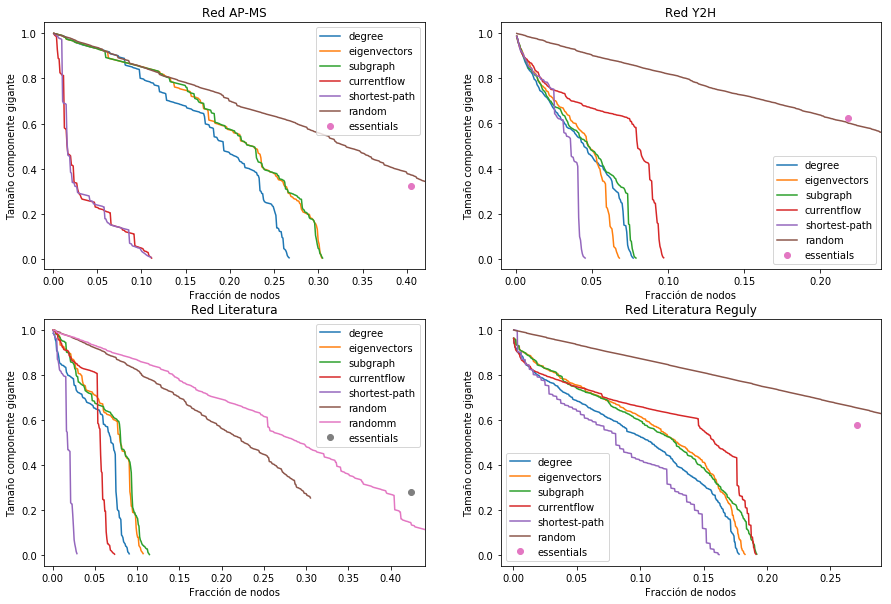

In [79]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1) 
plt.title('Red AP-MS')
plt.plot(DegreeAPMS[:,0],DegreeAPMS[:,1],label='degree')
plt.plot(EigenAPMS[:,0],EigenAPMS[:,1],label='eigenvectors')
plt.plot(SubgraphAPMS[:,0],SubgraphAPMS[:,1],label='subgraph')
plt.plot(CurrentAPMS[:,0],CurrentAPMS[:,1],label='currentflow')
plt.plot(ShortestAPMS[:,0],ShortestAPMS[:,1],label='shortest-path')
plt.plot(FNRandomAPMS,LGCRandomAPMS,label='random')
plt.plot(FN_E_APMS,LGC_E_APMS,'o',label='essentials')
plt.xlabel('Fracción de nodos')
plt.ylabel('Tamaño componente gigante')
plt.xlim(-0.01, 0.42)
plt.legend()

plt.subplot(2, 2, 2) 
plt.title('Red Y2H')
plt.plot(DegreeY2H[:,0],DegreeY2H[:,1],label='degree')
plt.plot(EigenY2H[:,0],EigenY2H[:,1],label='eigenvectors')
plt.plot(SubgraphY2H[:,0],SubgraphY2H[:,1],label='subgraph')
plt.plot(CurrentY2H[:,0],CurrentY2H[:,1],label='currentflow')
plt.plot(ShortestY2H[:,0],ShortestY2H[:,1],label='shortest-path')
plt.plot(FNRandomY2H,LGCRandomY2H,label='random')
plt.plot(FN_E_Y2H,LGC_E_Y2H,'o',label='essentials')
plt.xlabel('Fracción de nodos')
plt.ylabel('Tamaño componente gigante')
plt.xlim(-0.01, 0.24)
plt.legend()

plt.subplot(2, 2, 3) 
plt.title('Red Literatura')
plt.plot(DegreeLIT[:,0],DegreeLIT[:,1],label='degree')
plt.plot(EigenLIT[:,0],EigenLIT[:,1],label='eigenvectors')
plt.plot(SubgraphLIT[:,0],SubgraphLIT[:,1],label='subgraph')
plt.plot(CurrentLIT[:,0],CurrentLIT[:,1],label='currentflow')
plt.plot(ShortestLIT[:,0],ShortestLIT[:,1],label='shortest-path')
plt.plot(FNRandomLIT,LGCRandomLIT,label='random')
plt.plot(RandomLIT[:,0],RandomLIT[:,1],label='random')
plt.plot(FN_E_LIT,LGC_E_LIT,'o',label='essentials')
plt.xlabel('Fracción de nodos')
plt.ylabel('Tamaño componente gigante')
plt.xlim(-0.01, 0.44)
plt.legend()

plt.subplot(2, 2, 4) 
plt.title('Red Literatura Reguly')
plt.plot(DegreeLIT_R[:,0],DegreeLIT_R[:,1],label='degree')
plt.plot(EigenLIT_R[:,0],EigenLIT_R[:,1],label='eigenvectors')
plt.plot(SubgraphLIT_R[:,0],SubgraphLIT_R[:,1],label='subgraph')
plt.plot(CurrentLIT_R[:,0],CurrentLIT_R[:,1],label='currentflow')
plt.plot(ShortestLIT_R[:,0],ShortestLIT_R[:,1],label='shortest-path')
plt.plot(FNRandomLIT_R,LGCRandomLIT_R,label='random')
plt.plot(FN_E_LIT_R,LGC_E_LIT_R,'o',label='essentials')
plt.xlabel('Fracción de nodos')
plt.ylabel('Tamaño componente gigante')
plt.xlim(-0.01, 0.29)
plt.legend()

#plt.savefig('vulnerabilidad.png')

In [75]:
current=np.loadtxt('current.txt')
shortest=np.loadtxt('shortest.txt')